In [17]:
import pandas as pd
import numpy as np

file_path = "Lab Session Data.xlsx"


xls = pd.ExcelFile(file_path)

df = pd.read_excel(xls, sheet_name="Purchase data")
df_cleaned = df.iloc[:, :5]
df_cleaned.columns = ["Customer", "Candies", "Mangoes", "Milk Packets", "Payment"]
df_cleaned = df_cleaned.drop(columns=["Customer"])

A = df_cleaned.iloc[:, :-1].values
C = df_cleaned.iloc[:, -1].values

dimensionality = A.shape[1]
num_vectors = A.shape[0]
rank_A = np.linalg.matrix_rank(A)

A_pinv = np.linalg.pinv(A)
product_costs = A_pinv @ C

print(f"Dimensionality of the vector space: {dimensionality}")
print(f"Number of vectors in this vector space: {num_vectors}")
print(f"Rank of Matrix A: {rank_A}")
print(f"Cost of each product:")
print(f"  - Candy: ₹{product_costs[0]:.2f} per unit")
print(f"  - Mango: ₹{product_costs[1]:.2f} per kg")
print(f"  - Milk Packet: ₹{product_costs[2]:.2f} per unit")




Dimensionality of the vector space: 3
Number of vectors in this vector space: 10
Rank of Matrix A: 3
Cost of each product:
  - Candy: ₹1.00 per unit
  - Mango: ₹55.00 per kg
  - Milk Packet: ₹18.00 per unit


In [11]:
import pandas as pd
import numpy as np

file_path = "Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)

df = pd.read_excel(xls, sheet_name="Purchase data")
df_cleaned = df.iloc[:, :5]
df_cleaned.columns = ["Customer", "Candies", "Mangoes", "Milk Packets", "Payment"]
df_cleaned = df_cleaned.drop(columns=["Customer"])

A = df_cleaned.iloc[:, :-1].values
C = df_cleaned.iloc[:, -1].values

A_pinv = np.linalg.pinv(A)
X = A_pinv @ C

print("Model Vector X (Product Costs):")
print(f"  - Candy: ₹{X[0]:.2f} per unit")
print(f"  - Mango: ₹{X[1]:.2f} per kg")
print(f"  - Milk Packet: ₹{X[2]:.2f} per unit")


Model Vector X (Product Costs):
  - Candy: ₹1.00 per unit
  - Mango: ₹55.00 per kg
  - Milk Packet: ₹18.00 per unit


In [18]:
import pandas as pd

file_path = "Lab Session Data.xlsx"

data = pd.read_excel(file_path, sheet_name="Purchase data")

data["Customer Type"] = ["RICH" if amount > 200 else "POOR" for amount in data["Payment (Rs)"]]

print(data[["Customer", "Customer Type"]])


  Customer Customer Type
0      C_1          RICH
1      C_2          RICH
2      C_3          RICH
3      C_4          POOR
4      C_5          RICH
5      C_6          POOR
6      C_7          RICH
7      C_8          RICH
8      C_9          POOR
9     C_10          POOR


   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

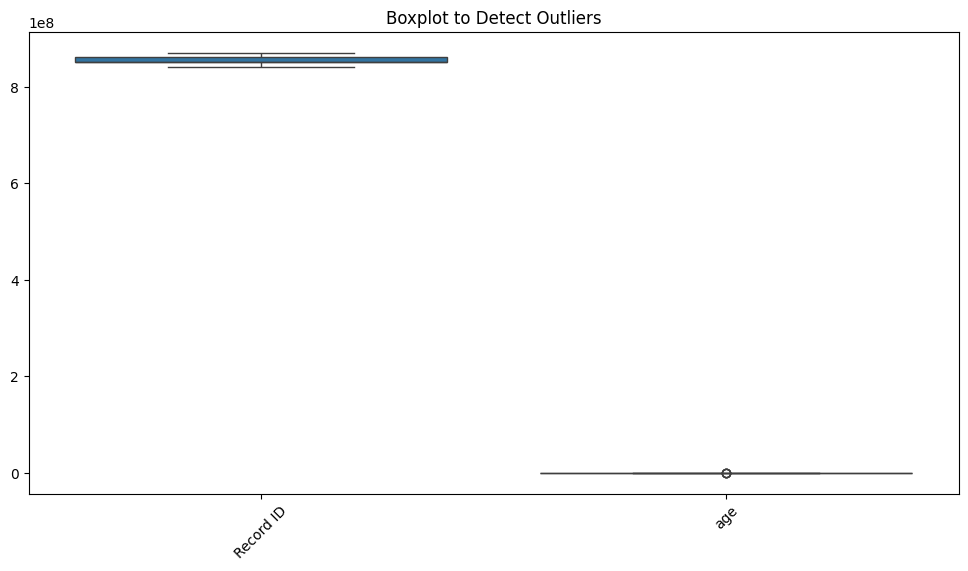

Mean:
 Record ID    8.529473e+08
age          7.355582e+01
dtype: float64 

Standard Deviation:
 Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

print(data.head(), "\n")
print("Data Types:\n", data.dtypes, "\n")

cat_cols = data.select_dtypes(include=["object"]).columns
num_cols = data.select_dtypes(include=["number"]).columns

print("Categorical Columns:\n", cat_cols, "\n")
print("Numeric Range:\n", data[num_cols].agg(['min', 'max']), "\n")

print("Missing Values:\n", data.isnull().sum(), "\n")

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()

print("Mean:\n", data[num_cols].mean(), "\n")
print("Standard Deviation:\n", data[num_cols].std())
